# Betrachtung des Zusammenhangs zwischen den einzelnen Dimensionen des Würfels und der Laufzeit

Von: Felix Schulze Sindern

Dieses Notebook ist Grundlage für das Kapitel 3.3 "Untersuchung Faktor Quadergröße (Felix Schulze Sindern)".
Es soll untersucht werden, ob jede Dimension des Quaders den gleichen Einfluss auf die Laufzeit hat.


In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
initial_data = pd.read_csv('../individual_cuboid_sizes_measurements.csv')

## Fragestellung 1: Hat jede Dimension des Quaders den gleichen Einfluss auf die Laufzeit?

In [3]:
data1 = initial_data
values = data1.apply(list(filter(lambda x: x.isdigit(), data1.columns)), axis=1)
data1['avg'] = values.mean(axis=1)
data1 = data1.drop(list(filter(lambda x: x.isdigit(), data1.columns)), axis=1)

grouped_by_length = data1.groupby('length').mean().reset_index()
grouped_by_width = data1.groupby('width').mean().reset_index()
grouped_by_height = data1.groupby('height').mean().reset_index()
grouped_by_height

,height,length,width,avg
0,100,233.333333,233.333333,3314.819444
1,200,233.333333,233.333333,9609.302083
2,400,233.333333,233.333333,24150.347222


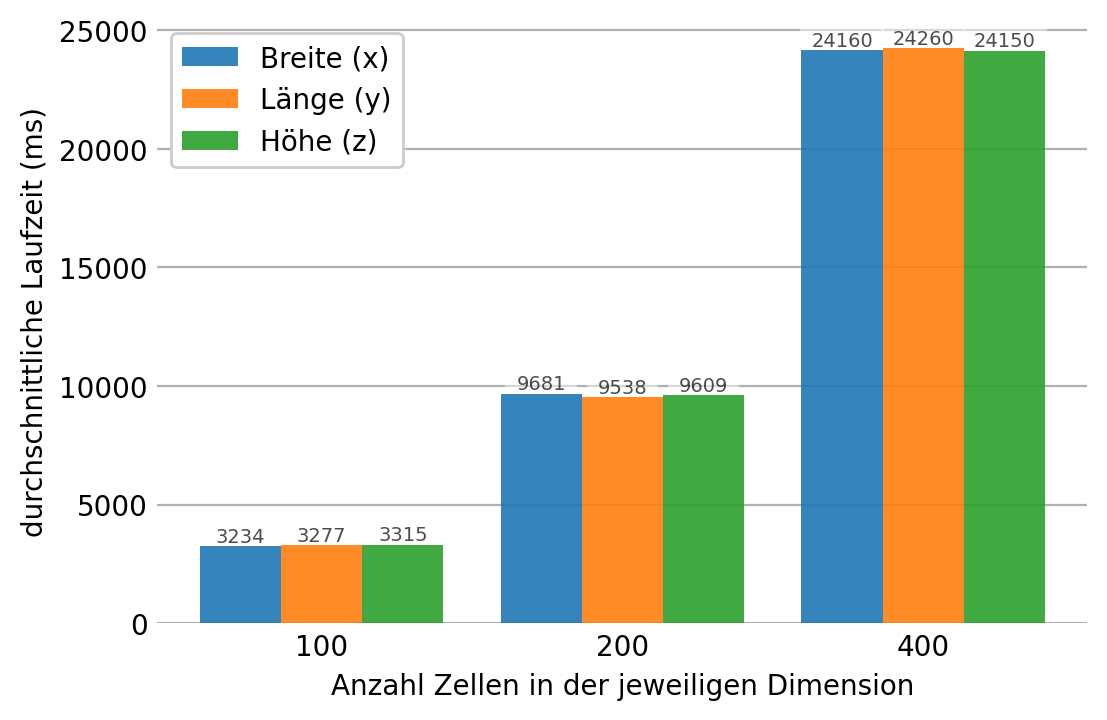

In [121]:
from matplotlib.text import Text

fig, ax = plt.subplots(figsize=(6,4), dpi=200)

x = np.arange(len(grouped_by_height.height))
width = 0.27  # the width of the bars

width_rect = ax.bar(x - width, grouped_by_width.avg, width, label='Breite (x)', zorder=100, alpha=0.9)
height_rect = ax.bar(x, grouped_by_length.avg, width, label='Länge (y)', zorder=100, alpha=0.9)
length_rect = ax.bar(x + width, grouped_by_height.avg, width, label='Höhe (z)', zorder=100, alpha=0.9)
ax.legend(framealpha=1)

ax.set(ylabel='durchschnittliche Laufzeit (ms)', xlabel='Anzahl Zellen in der jeweiligen Dimension')
ax.set_xticks(x, grouped_by_height.height)

ax.tick_params(length=0)
ax.grid(axis='y', zorder=1)

grid_color= ax.get_xgridlines()[0].get_color()
# ax.set_axisbelow(True)
for spine in ax.spines.values():
    spine.set_visible(False)

# Die Ausführungszeit an den Säulen angezeigen
for plot, data, pos_factor in zip([width_rect, height_rect, length_rect], [grouped_by_width.avg, grouped_by_length.avg, grouped_by_height.avg], [-1, 0, 1]):
    all_pos_x = x +( width * pos_factor)
    
    for i, rect in enumerate(plot):
        pos_x = all_pos_x[i]
        text: Text = plt.text(pos_x, data[i] + 400, round(data[i]), verticalalignment='center', horizontalalignment='center',alpha=0.7, fontsize=7, bbox=dict(facecolor="white", alpha=0.5,linewidth=0.0))
        

In [122]:
fig.savefig('individual_cuboid_sizes.svg', dpi=300, bbox_inches='tight', pad_inches=0, format='svg')

In [120]:
all_data = [grouped_by_width.avg, grouped_by_length.avg, grouped_by_height.avg]
for data in zip(*all_data):
    w,l,h = data
    minimum = min(data)
    maximum = max(data)
    difference = maximum - minimum
    difference_percentage = difference / minimum * 100
    print(f"""
min: {minimum:.2f}
max: {maximum:.2f} 
diff: {difference:.2f}
diff_percentage: {difference_percentage:.2f}%""")
    


min: 3233.76
max: 3314.82 
diff: 81.06
diff_percentage: 2.51%

min: 9537.90
max: 9681.19 
diff: 143.29
diff_percentage: 1.50%

min: 24150.35
max: 24259.92 
diff: 109.57
diff_percentage: 0.45%
